# Tutorial

## Initialize

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yahoo_fin.stock_info as si

# private module to use yahoo_fin
import mystock_info as mi

##
import importlib
importlib.reload(mi)

<module 'mystock_info' from '/home/jovyan/yahoo_fin/mystock_info.py'>

## Overview

This module calls yahoo_fin functions and returns the results by a dataframe. 

**Remarks:** **The downloaded data is cached,** and automatically loaded from the cache if you have new one. The cache is valid for 24 hours in default, but you can change it.

### Download and plot EPS history

- `get_earnings_history()`
- `search_good_eps()`

### Find tickers with high EPS beat ratio

- `search_good_eps()`
- `show_beat_ratio()`

### Download and plot valuation data

- `get_valuation_data()`
- `plot_valuation()`

### In a nut shell

- `get_all_data(tickers, last=20, table=True)`

## Download and plot EPS history

###  plot_eps(tickers, clear_cache=1, last=20, largefig=False, verbose=False)
- This function plots EPS history.
- It calls `get_earnings_history()` (see below) inside the function and returns the obtained dataframe.
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
    - `clear_cache`: number of days cache should be kept

### screening_eps(tickers, last=20, threshold=80, min_qtrs=4, clear_cache=False, verbose=False)

- You can find good tickers based on the EPS beat ratio 
- get EPS history data for `tickers` and shows tickers with EPS beat ratio >= `threshold` within `last` quarters and with at least `min_qtrs` EPS data.
- return value:
    - combined dataframe of get_earnings_history() for all `tickers`, i.e.,
    ```
    for i in tickers:
        tmp=get_earnings_history(i)
        df=df.append(tmp)
    ``` 
- arguments:
    - `last`: number of quarters to be considred
    - `min_qtrs`: number of quarters required for evaluation
    - `clear_cache`: number of days of preserving cache. Set False if you want to use cache despite the creation date.
    - `threshold`: minimum EPS beat ratio in `last` quarters

### get_earnings_history(tickers, clear_cache=1, verbose=False)

- This function download EPS history data and returns the dataframe.
- Usually you don't need to call this function by yourself.
- front end of [yahoo_fin.stock_info.get_earnings_history()](http://theautomatic.net/yahoo_fin-documentation/#get_earnings_history) 
- arguments:
    - `tickers`: list of tickers or string of a ticker
    - `clear_cache`: number of days cache should be kept    

ntick: 5, nrow: 2, ncol: 4


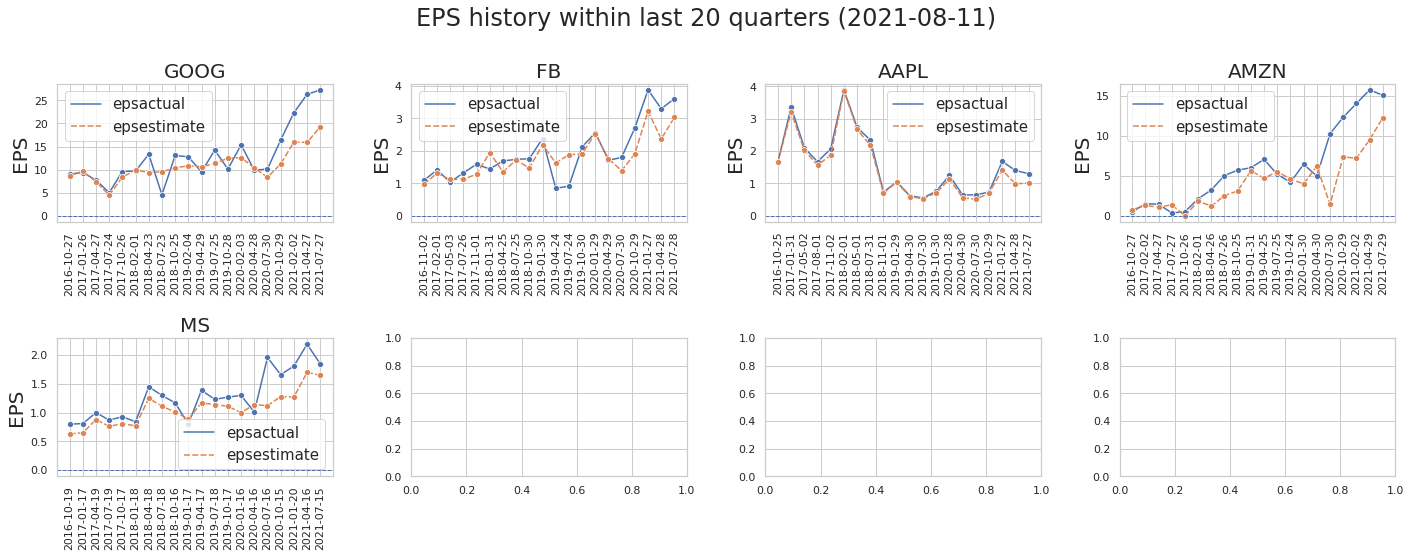

EPS beat ratio (%) within last 20 quarters (2021-08-11)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20
AMZN,"Amazon.com, Inc.",75.0,15,20
FB,"Facebook, Inc.",75.0,15,20
GOOG,Alphabet Inc.,70.0,14,20


In [16]:
import importlib
importlib.reload(mi)

gafam=["GOOG","FB","AAPL","AMZN","MS"]

mi.plot_eps_history(gafam,last=20,largefig=False)
ret=mi.show_beat_ratio(gafam,threshold=False,verbose=False)
#ret=mi.show_beat_ratio(gafam, last=20, threshold=80, min_qtrs=4)

If you prefer larger graphs, set the argument `largefig=True` in `plot_eps()`.

ntick: 1, nrow: 1, ncol: 1


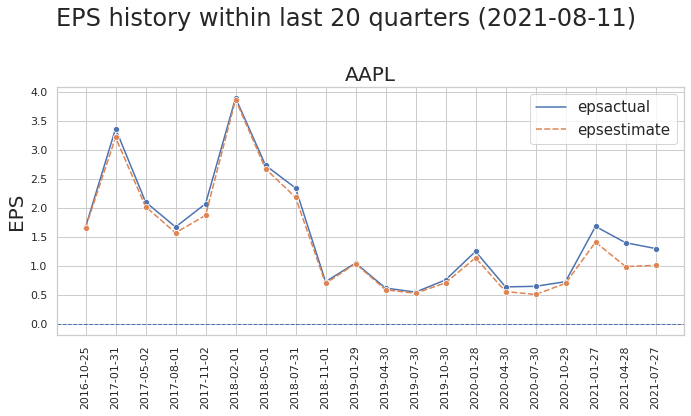

getting data of AAPL
cache/AAPL__earnings.pkl is found and preserve cache: AAPL__earnings
loading cache data: AAPL__earnings
EPS beat ratio (%) within last 20 quarters (2021-08-11)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100,20,20


In [17]:
mi.plot_eps_history("AAPL",largefig=True)
ret=mi.show_beat_ratio("AAPL",threshold=False,verbose=True)


## Download and plot valuation data

You can get valuation data including PSR, PBR, and PER using `get_valuation_data()` and can plot the distribution of PSRs using `plot_valuation()`.

### plot_valuation(df, hist=True, table=True, key="PSR"):
- Plot histogram of PSR(default) distribution and print the PSR ranking.
- This function calls `get_valuation_data()` (see below) inside the function and retunrs the obtained dataframe.
- Sorting key can be 
    - "PSR" : Price to Sales Ratio
    - "PBR" : Price Book-value Ratio
    - "PER" : Price Earning Ratio
    - "EPS" : Earning Per Share
    - "Cap" : Market Cap --- Currently sorting doesn't work
- return value:
    - dataframe sorted by the given key
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
   
### get_valuation_data(tickers, clear_cache=7, verbose=False)
- download valuation data including PSR, PBR, Pand ER using [`yahoo_fin.stock_info.get_quote_table()`](http://theautomatic.net/yahoo_fin-documentation/#get_quote_table) and [`yahoo_fin.stock_info.get_stats_valuation()`](http://theautomatic.net/yahoo_fin-documentation/#get_stats_valuation), and returns the combined dataframe.
- Usually you don't need to call this function explicitly.
- return value:
    - dataframe of the valuation data of `tickers`
    

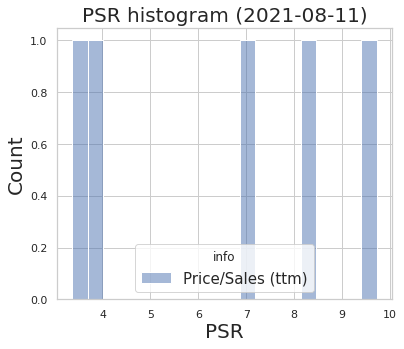

PSR sorted list (<function today at 0x4089fb10d0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,1.018000e+12,361.61,386.47,9.72,26.82,7.38,"Oct 27, 2021 - Nov 01, 2021"
GOOG,1.834000e+12,2760.04,2625.00,8.33,29.96,7.76,NaN
AAPL,2.407000e+12,146.09,159.34,6.93,28.50,37.51,"Oct 27, 2021 - Nov 01, 2021"
AMZN,1.682000e+12,3341.87,4241.33,3.79,57.86,14.64,"Oct 27, 2021 - Nov 01, 2021"
MS,1.861780e+11,100.74,98.53,3.37,13.53,1.89,"Oct 13, 2021 - Oct 18, 2021"


In [21]:
df_psr_sorted = mi.show_valuation(gafam, hist=True, table=True)

# Download and plot revenue data

## def plot_revenue(tickers, clear_cache=7, verbose=False):

- Plot revenue data 
- This function get revenue data using `si.get_earnings()` (see below) and returns it in dict format.


## def get_revenue(tickers, clear_cache=7, verbose=False):

- get revenue data using `si.get_earnings()` and returns it in dict format.
return value:
- dict of which keys are 'quarterly_results', 'yearly_revenue_earnings', and  'quarterly_revenue_earnings' and values are dataframe for `tickers`.

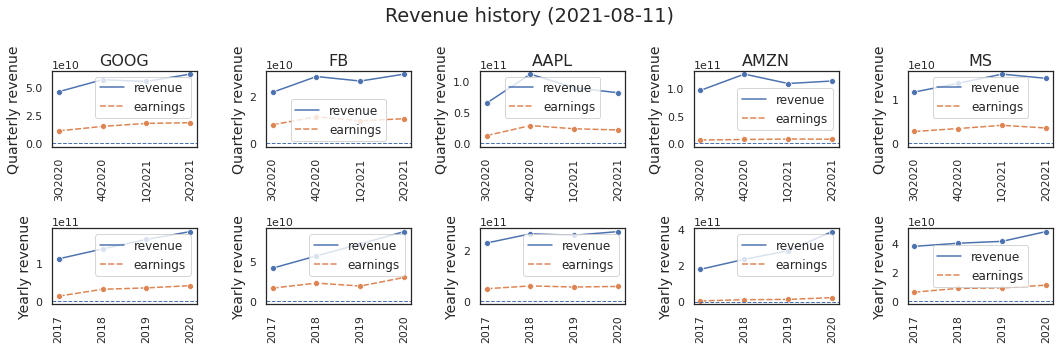

In [23]:
import importlib
importlib.reload(mi)
ret=mi.plot_revenue_history(gafam)

In [52]:
display(ret["quarterly_revenue_earnings"])

,date,revenue,earnings,Ticker
0,3Q2020,46173000000,11247000000,GOOG
1,4Q2020,56898000000,15227000000,GOOG
2,1Q2021,55314000000,17930000000,GOOG
3,2Q2021,61880000000,18525000000,GOOG
0,3Q2020,21470000000,7846000000,FB
1,4Q2020,28072000000,11219000000,FB
2,1Q2021,26171000000,9497000000,FB
3,2Q2021,29077000000,10394000000,FB
0,3Q2020,64698000000,12673000000,AAPL
1,4Q2020,111439000000,28755000000,AAPL


## In a nut shell

**Attention: Under construction from here**

You can get both of EPS history and valuation data by `mi.get_all_data()`.

### get_all_data(tickers, last=20, table=True)
- run the following
    1. download EPS history (`get_earnings_history()`))
    2. download valuation data (`get_valuation_data()`)
    3. shows the EPS beat ratios in 'last' quarters (`show_beat_ratio()`)
- arguments:
    - `tickers`: list of tickers 
    - `last=20`: number of quarters to be considred to get EPS beat ratio
    - `table=False`: show the table of EPS beat ratio or not
- return value: tuple of return values of `get_earnings_history()` and `get_valuation_data()`

ntick: 5, nrow: 2, ncol: 4


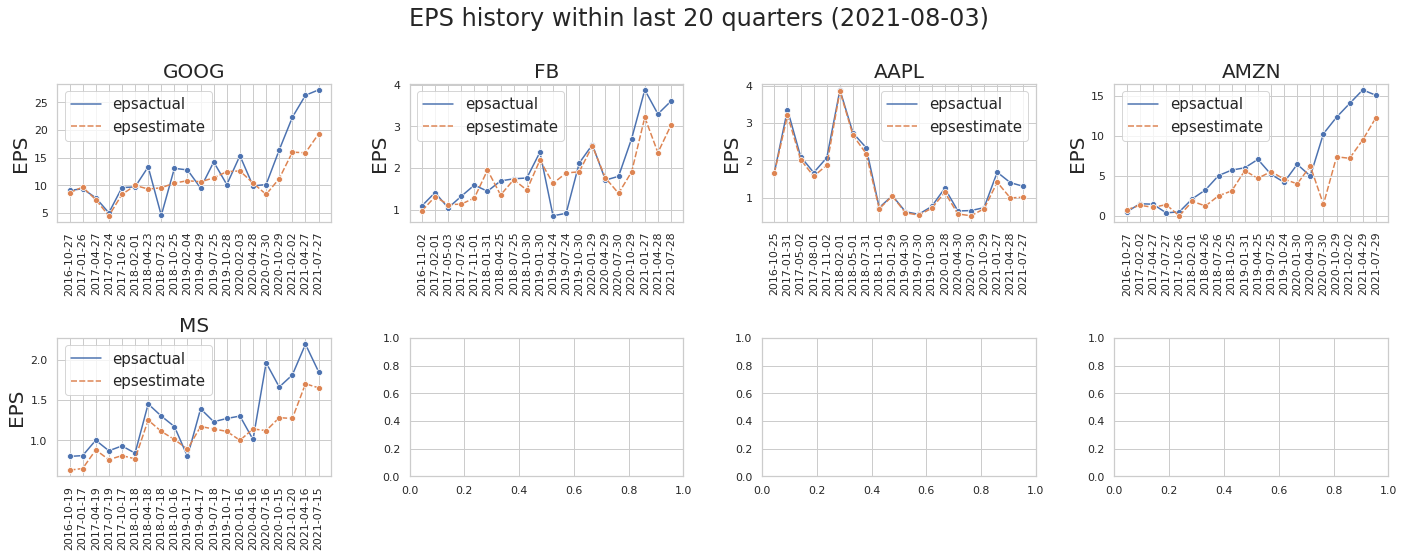

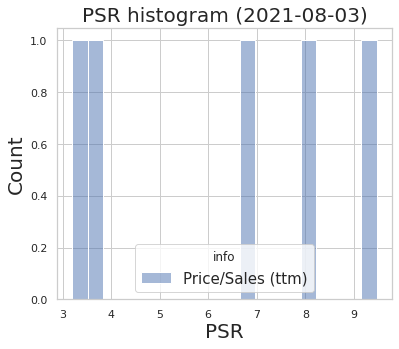

PSR sorted list (<function today at 0x7f7e9f2ab0d0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,9.927250e+11,351.95,386.47,9.47,26.15,7.20,"Oct 27, 2021 - Nov 01, 2021"
GOOG,1.809000e+12,2719.79,2625.00,8.21,29.48,7.64,NaN
AAPL,2.404000e+12,145.52,159.34,6.93,28.47,37.48,"Oct 27, 2021 - Nov 01, 2021"
AMZN,1.679000e+12,3331.48,4241.33,3.79,57.99,14.67,"Oct 27, 2021 - Nov 01, 2021"
MS,1.769810e+11,96.23,98.53,3.20,12.79,1.83,"Oct 13, 2021 - Oct 18, 2021"


In [7]:
df_all=mi.get_all_data(gafam, table=False)
mi.plot_eps(gafam,last=20) # show EPS history within last 20 quarters
ret=mi.show_valuation(gafam)

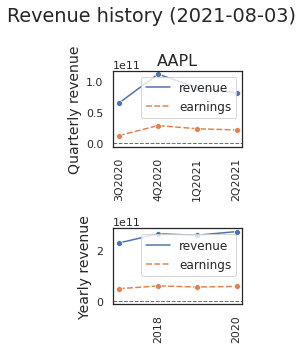

{'quarterly_results':      date  actual  estimate Ticker
 0  2Q2020    0.64      0.51   AAPL
 1  3Q2020    0.73      0.70   AAPL
 2  4Q2020    1.68      1.41   AAPL
 3  1Q2021    1.40      0.99   AAPL,
 'yearly_revenue_earnings':    date       revenue     earnings Ticker
 0  2017  229234000000  48351000000   AAPL
 1  2018  265595000000  59531000000   AAPL
 2  2019  260174000000  55256000000   AAPL
 3  2020  274515000000  57411000000   AAPL,
 'quarterly_revenue_earnings':      date       revenue     earnings Ticker
 0  3Q2020   64698000000  12673000000   AAPL
 1  4Q2020  111439000000  28755000000   AAPL
 2  1Q2021   89584000000  23630000000   AAPL
 3  2Q2021   81434000000  21744000000   AAPL}

In [8]:
mi.plot_revenue("AAPL")

In [77]:
cf_y = si.get_cash_flow("AAPL")
bs_y = si.get_balance_sheet("AAPL")
is_y = si.get_income_statement("AAPL")

# cf_q = si.get_cash_flow("AAPL", yearly=False)
# bs_q = si.get_balance_sheet("AAPL", yearly=False)
# is_q = si.get_income_statement("AAPL",yearly=False)

In [226]:
# display(cf_y.index)
# display(bs_y.index)
# display(is_y.index)

# display(cf_q)
# display(bs_y)
# display(is_q)
df = pd.concat([cf_y, bs_y, is_y.drop("netIncome")])
print(list(cf_y.index).index("netIncome"))
#print(list(cf_y.index)[7])
# print(list(bs_y.index).index("netIncome"))
#print(list(df.index).index("netIncome"))
#print(list(is_y.index)[4])


df = df.T
print("netIncome" in list(df.columns))

# col2 = df.index
# print("col:", "operatingIncome" in col)
# print("col2:", "operatingIncome" in col2)

7
True


In [287]:
df.index.strftime("%Y-%m")

Index(['2020-09', '2019-09', '2018-09', '2017-09'], dtype='object', name='endDate')

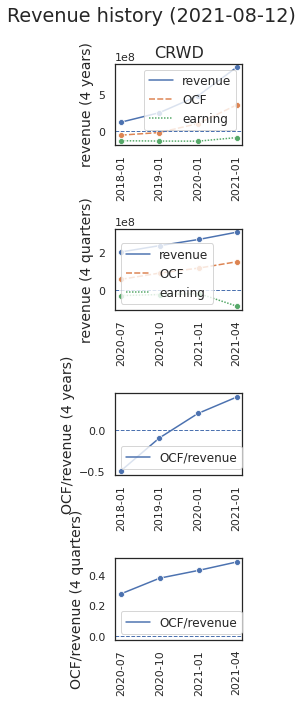

In [321]:
import importlib
importlib.reload(mi)
#df = mi.get_financial_history("AAPL", clear_cache=7,yearly=True)
ret=mi.plot_financial_history("CRWD")

In [310]:
ret

{'years': Breakdown  Ticker          OCF          ICF          FCF      earning  \
 endDate                                                                 
 2018-01-31   CRWD  -58766000.0  -28330000.0  126831000.0 -135490000.0   
 2019-01-31   CRWD  -22968000.0 -142030000.0  190389000.0 -140077000.0   
 2020-01-31   CRWD   99943000.0 -629631000.0  706144000.0 -141779000.0   
 2021-01-31   CRWD  356566000.0  495427000.0  800135000.0  -92629000.0   
 
 Breakdown       revenue  Operating Income  OCF/revenue  
 endDate                                                 
 2018-01-31  118752000.0      -131440000.0    -0.494863  
 2019-01-31  249824000.0      -136864000.0    -0.091937  
 2020-01-31  481413000.0      -146065000.0     0.207603  
 2021-01-31  874438000.0       -88771000.0     0.407766  ,
 'quarters': Breakdown  Ticker          OCF          ICF          FCF     earning  \
 endDate                                                                
 2020-07-31   CRWD   55025000.0  -2360

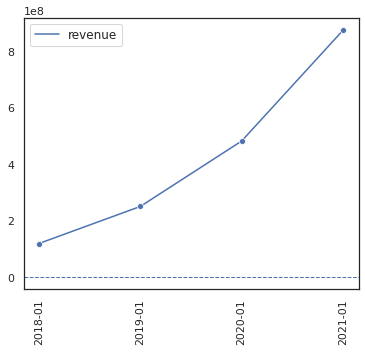

In [319]:
def test_plot_fig(df, ax, target, title="", ylabel=""):
    sns.lineplot(ax=ax, data=df[target], marker="o")
    ax.set_title(title)
    ax.tick_params(axis="x", labelrotation=90)
    ax.axhline(linewidth=1, linestyle="--")
    ax.set_xlabel("")
    ax.set_ylabel(ylabel)
    ax.legend(title='')
#    ax.set_xticks(df.index)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index.strftime("%Y-%m"))
#    ax.xaxis.set_major_locator(plt.MaxNLocator(len(df)))

fig, ax = plt.subplots()
test_plot_fig(ret['years'],ax,["revenue"])

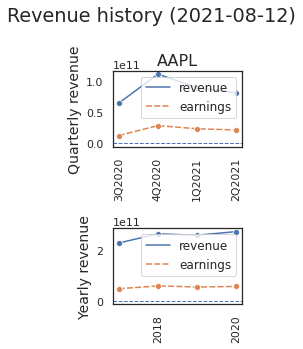

In [268]:
ret=mi.plot_revenue_history("AAPL")

In [291]:
a=si.get_stats("AAPL")
b=si.get_stats_valuation("AAPL")
c=si.get_quote_table("AAPL")

In [308]:
display(a)

,Attribute,Value
0,Beta (5Y Monthly),1.20
1,52-Week Change 3,26.60%
2,S&P500 52-Week Change 3,31.52%
3,52 Week High 3,150.00
4,52 Week Low 3,103.10
5,50-Day Moving Average 3,143.56
6,200-Day Moving Average 3,132.14
7,Avg Vol (3 month) 3,78.92M
8,Avg Vol (10 day) 3,57.48M
9,Shares Outstanding 5,16.53B


In [306]:
display(b)

,0,1
0,Market Cap (intraday) 5,2.41T
1,Enterprise Value 3,2.48T
2,Trailing P/E,28.56
3,Forward P/E 1,27.31
4,PEG Ratio (5 yr expected) 1,1.53
5,Price/Sales (ttm),6.95
6,Price/Book (mrq),37.57
7,Enterprise Value/Revenue 3,7.14
8,Enterprise Value/EBITDA 7,22.36


In [307]:
#c=si.get_quote_table("AAPL")
display(c)

{'1y Target Est': 159.34,
 '52 Week Range': '103.10 - 150.00',
 'Ask': '145.79 x 800',
 'Avg. Volume': 78917714.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '145.70 x 1800',
 "Day's Range": '145.53 - 146.72',
 'EPS (TTM)': 5.11,
 'Earnings Date': 'Oct 27, 2021 - Nov 01, 2021',
 'Ex-Dividend Date': 'Aug 06, 2021',
 'Forward Dividend & Yield': '0.88 (0.60%)',
 'Market Cap': '2.411T',
 'Open': 146.05,
 'PE Ratio (TTM)': 28.56,
 'Previous Close': 145.6,
 'Quote Price': 145.86000061035156,
 'Volume': 48493463.0}